Import Required Libraries


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


Load Iris Dataset

In [4]:
iris = load_iris()

# ONLY Petal Length & Petal Width (for visualization)
X = iris.data[:, [2, 3]]
y = iris.target
# class labels


Train–Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)




Build CART Classifier

In [7]:
clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=2,      # keep small for clear boundary
    random_state=42
)

clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

Train the Model

In [8]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

Make Predictions

In [9]:
y_pred = clf.predict(X_test)


Accuracy

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8888888888888888


Precision, Recall, F1-Score

In [13]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8898809523809524
Recall: 0.888888888888889
F1 Score: 0.8887652947719689


Confusion Matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  2 13]]


Classification Report (All Metrics Together)

In [ ]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



(Optional) Visualize the CART Tree

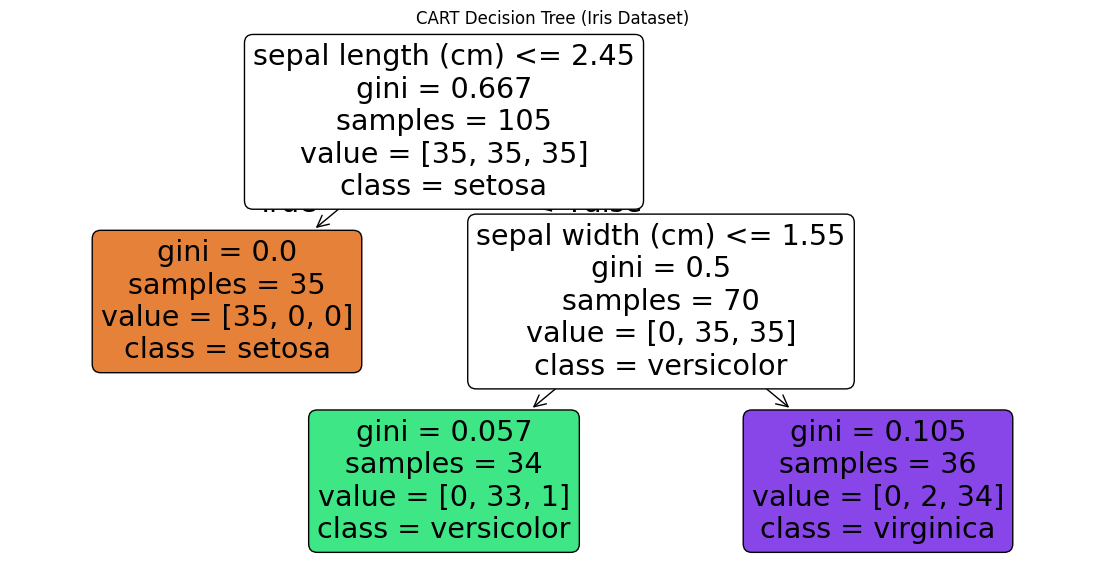

In [16]:
plt.figure(figsize=(14, 7))
plot_tree(
    clf,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True
)
plt.title("CART Decision Tree (Iris Dataset)")
plt.show()


Decision Boundary Graph

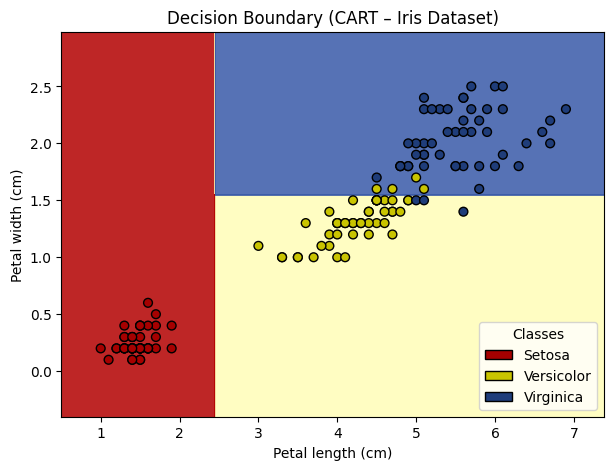

In [17]:
# Create mesh grid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

# Predict for each grid point
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colors
cmap_light = ListedColormap(['#b30000', '#fffdb8', '#3859a8'])
cmap_bold = ListedColormap(['#a60000', '#c9c400', '#1f3d7a'])

plt.figure(figsize=(7, 5))

# Plot decision regions
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.85)

# Plot data points
plt.scatter(
    X[:, 0], X[:, 1],
    c=y,
    cmap=cmap_bold,
    edgecolor='k',
    s=40
)

# Legend
legend_elements = [
    Patch(facecolor='#a60000', edgecolor='k', label='Setosa'),
    Patch(facecolor='#c9c400', edgecolor='k', label='Versicolor'),
    Patch(facecolor='#1f3d7a', edgecolor='k', label='Virginica')
]

plt.legend(handles=legend_elements, title="Classes", loc='lower right')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Decision Boundary (CART – Iris Dataset)')
plt.show()


# **CART Regression**

Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)


Create a Simple Regression Dataset

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:, :3]   # sepal length, sepal width, petal width
y = iris.data[:, 2]    # target = petal length (continuous)


Train-test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


Built CART Regerssor

In [ ]:
reg = DecisionTreeRegressor(
    criterion="squared_error",  # CART regression criterion
    max_depth=3,
    random_state=42
)


Train the model

In [ ]:
reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, random_state=42)

Make Predictions

In [ ]:
y_pred = reg.predict(X_test)


Mean Squared Error (MSE)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.045869245438141554


Mean Absolute Error (MAE)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.16852327624066765


R² Score

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.9863969412394612


Visualize CART Regression Tree

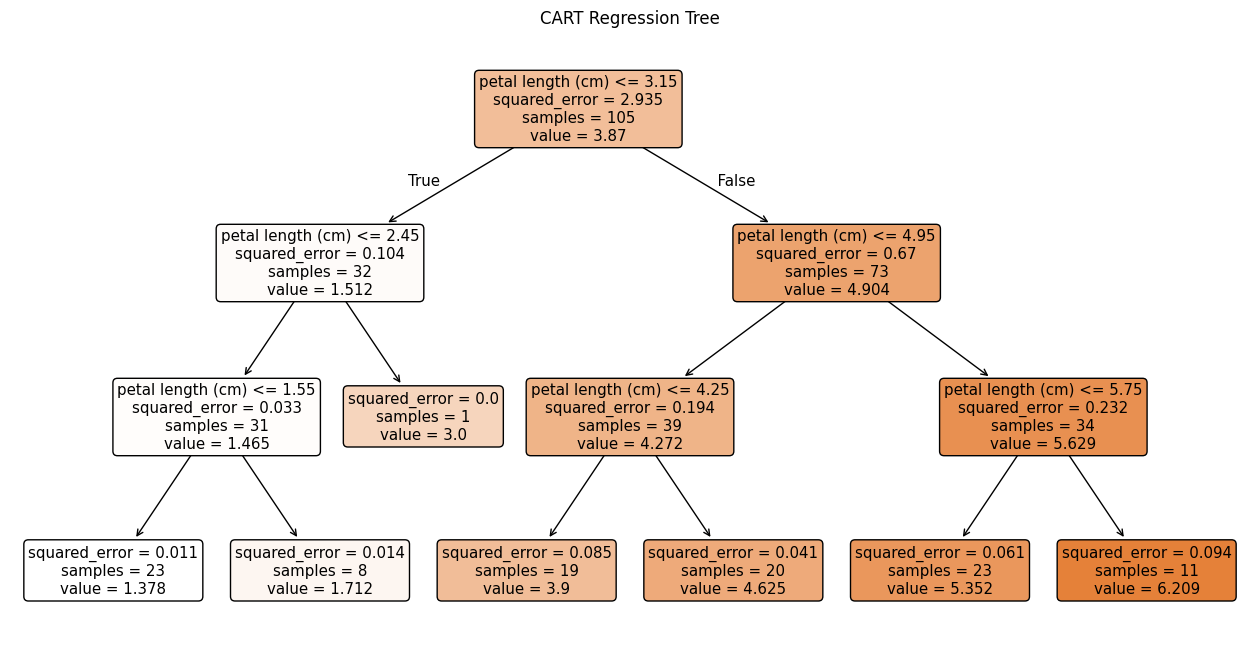

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(
    reg,
    feature_names=iris.feature_names[:3],
    filled=True,
    rounded=True
)
plt.title("CART Regression Tree")
plt.show()
